# Data Preparation:

I can run this notebook for each dataset to extract the features and prepare the training data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats #for feature extraction

## Load & Inspect

In [2]:
df1 = pd.read_csv("/kaggle/input/ims-dataset-1/bearing_datase1.csv")
df2 = pd.read_csv("/kaggle/input/bearings-dataset2-csv/combined_bearings_data.csv")
df3 = pd.read_csv("/kaggle/input/imsbearing-test-data/bearing_dataset3.csv")

In [3]:
df1.head()

index            timestamp  bearing1_ch1  bearing1_ch2  bearing2_ch3  \
0      0  2003.10.22.15.44.13        -0.115        -0.027         0.044   
1      1  2003.10.22.15.44.13        -0.081        -0.129        -0.027   
2      2  2003.10.22.15.44.13        -0.027        -0.017        -0.051   
3      3  2003.10.22.15.44.13         0.059        -0.112        -0.032   
4      4  2003.10.22.15.44.13         0.002         0.024        -0.083   

   bearing2_ch4  bearing3_ch5  bearing3_ch6  bearing4_ch7  bearing4_ch8  
0        -0.073        -0.137        -0.032        -0.129        -0.181  
1        -0.042        -0.212        -0.115        -0.151        -0.110  
2        -0.015        -0.083        -0.029        -0.139        -0.146  
3        -0.081        -0.100        -0.103        -0.166        -0.134  
4        -0.127        -0.154        -0.066        -0.110        -0.176

In [4]:
df2.head()

index            timestamp  bearing1  bearing2  bearing3  bearing4
0      0  2004.02.12.10.32.39    -0.049    -0.071    -0.132    -0.010
1      1  2004.02.12.10.32.39    -0.042    -0.073    -0.007    -0.105
2      2  2004.02.12.10.32.39     0.015     0.000     0.007     0.000
3      3  2004.02.12.10.32.39    -0.051     0.020    -0.002     0.100
4      4  2004.02.12.10.32.39    -0.107     0.010     0.127     0.054

In [5]:
df3.head()

index            timestamp  bearing1  bearing2  bearing3  bearing4
0      0  2004.03.04.09.27.46     0.034     0.264     0.039    -0.046
1      1  2004.03.04.09.27.46     0.103     0.083    -0.061    -0.012
2      2  2004.03.04.09.27.46     0.095    -0.039    -0.007     0.039
3      3  2004.03.04.09.27.46     0.000     0.110     0.022    -0.002
4      4  2004.03.04.09.27.46     0.005     0.154    -0.127    -0.020

In [6]:
counts1 = df1['timestamp'].value_counts()
counts2 = df2['timestamp'].value_counts()
counts3 = df3['timestamp'].value_counts()
print((counts1 == 20480).all())  # True if all timestamps have exactly 20,480 points
print((counts2 == 20480).all())
print((counts3 == 20480).all())

True
True
True


## Time Series Sanity Checks

In [7]:
print(df1.isnull().sum().sum())  # Total null count across entire DataFrame
print((df1 == '').sum().sum())  # Total empty string count across entire DataFrame
print(((df1.isnull()) | (df1 == '')).sum().sum())  # Combined null + empty string count

print(df2.isnull().sum().sum())  # Total null count across entire DataFrame
print((df2 == '').sum().sum())  # Total empty string count across entire DataFrame
print(((df2.isnull()) | (df1 == '')).sum().sum())  # Combined null + empty string count

print(df3.isnull().sum().sum())  # Total null count across entire DataFrame
print((df3 == '').sum().sum())  # Total empty string count across entire DataFrame
print(((df3.isnull()) | (df1 == '')).sum().sum())  # Combined null + empty string count

0
0
0
0
0
0.0
0
0
0.0


## Time series plot: separting the data into healthy, near failure and failure

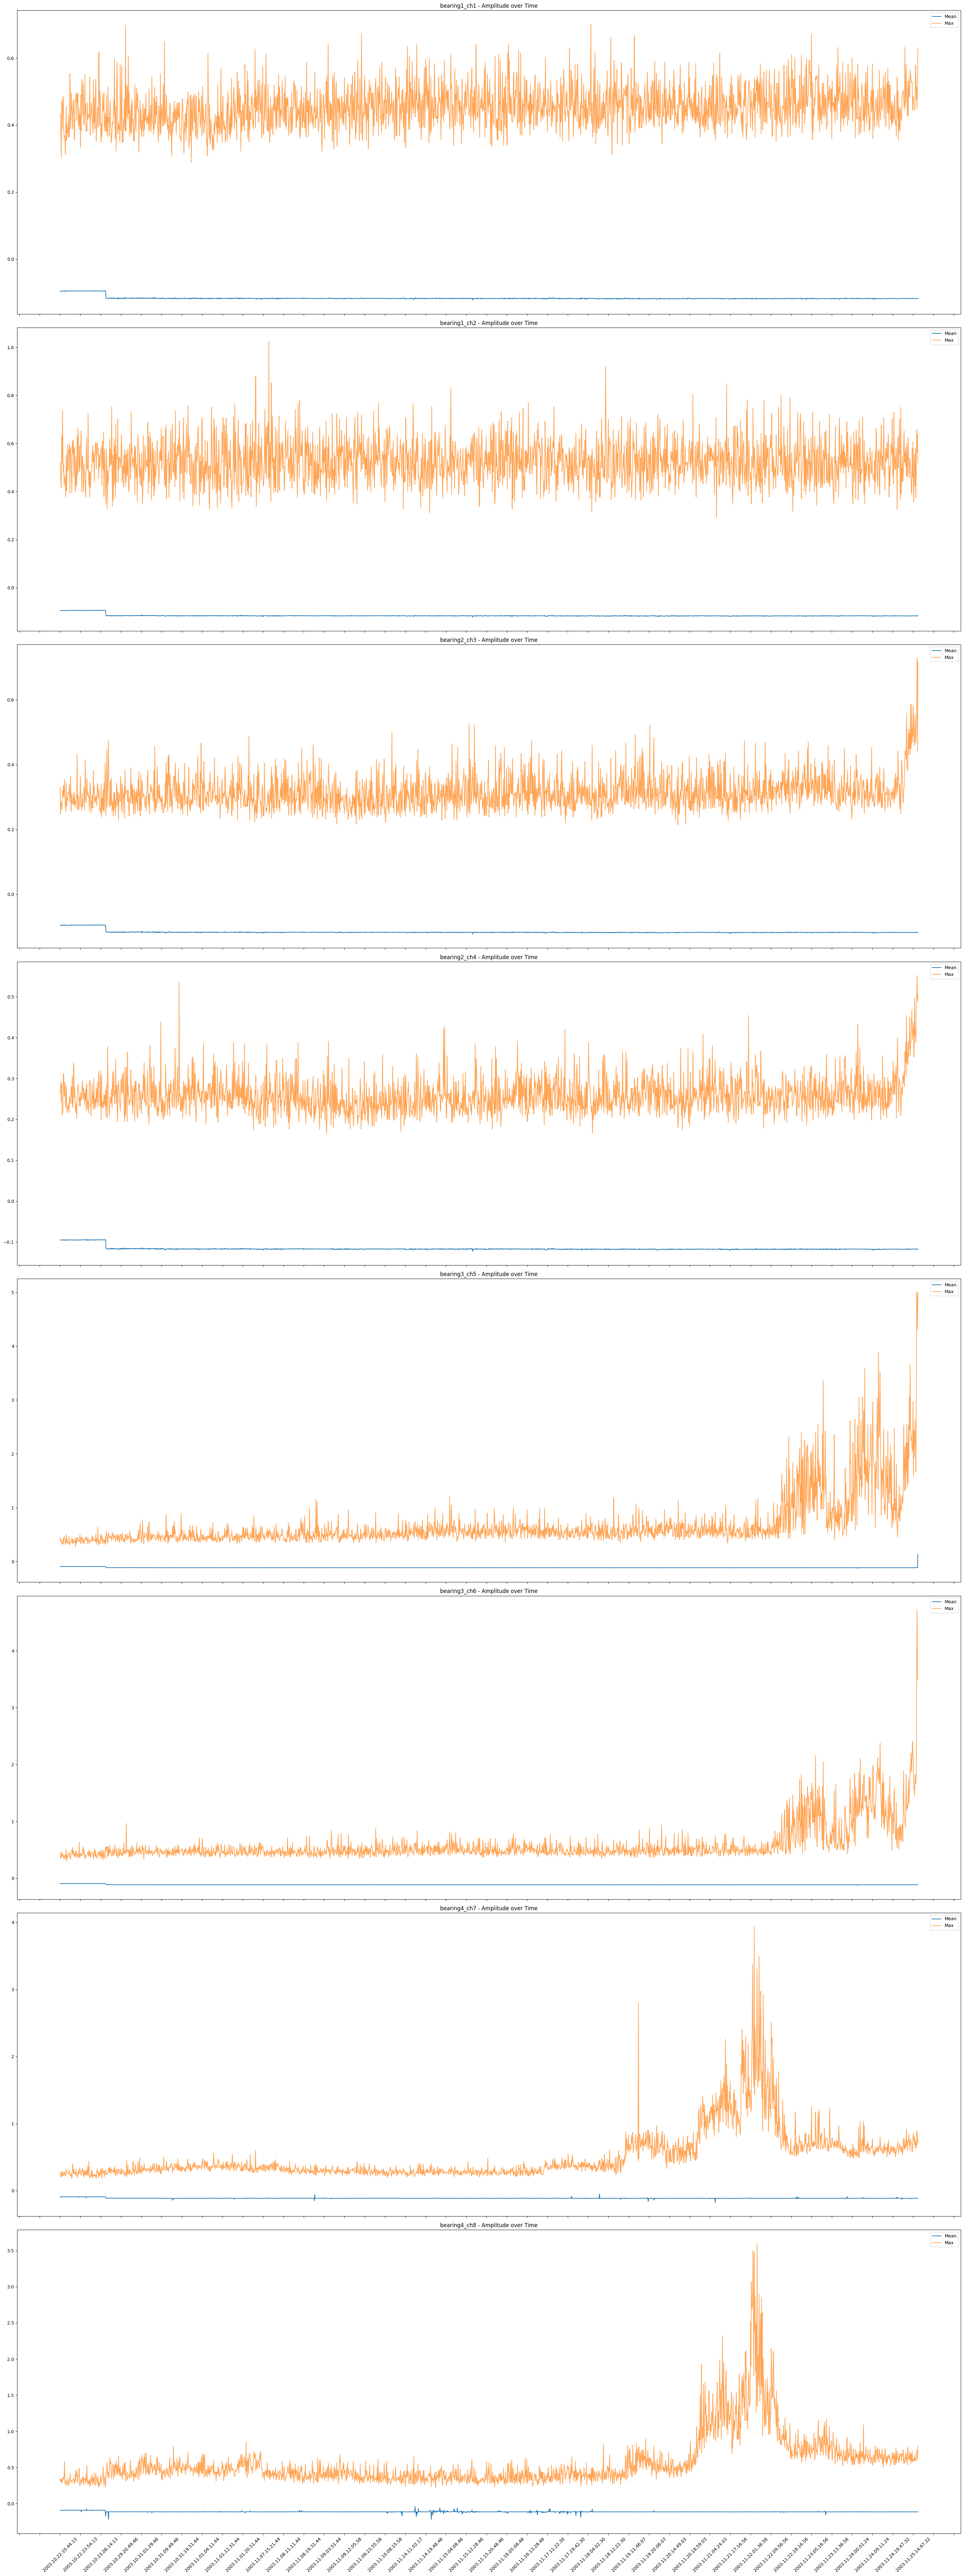

In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# 8 channels → 8 subplots
fig, axes = plt.subplots(8, 1, figsize=(30, 80), sharex=True)
axes = axes.flatten()

# List of all channel columns in df1
channels = [
    'bearing1_ch1', 'bearing1_ch2',
    'bearing2_ch3', 'bearing2_ch4',
    'bearing3_ch5', 'bearing3_ch6',
    'bearing4_ch7', 'bearing4_ch8'
]

for i, col in enumerate(channels, start=1):
    # Group by timestamp and calculate stats
    bearing_data = (
        df1.groupby('timestamp')[col]
        .agg(['mean', 'std', 'max'])
        .reset_index()
    )

    ax = axes[i-1]
    ax.plot(bearing_data['timestamp'], bearing_data['mean'], label='Mean')
    ax.plot(bearing_data['timestamp'], bearing_data['max'], label='Max', alpha=0.7)

    ax.xaxis.set_major_locator(MaxNLocator(nbins=50))
    ax.set_title(f'{col} - Amplitude over Time')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


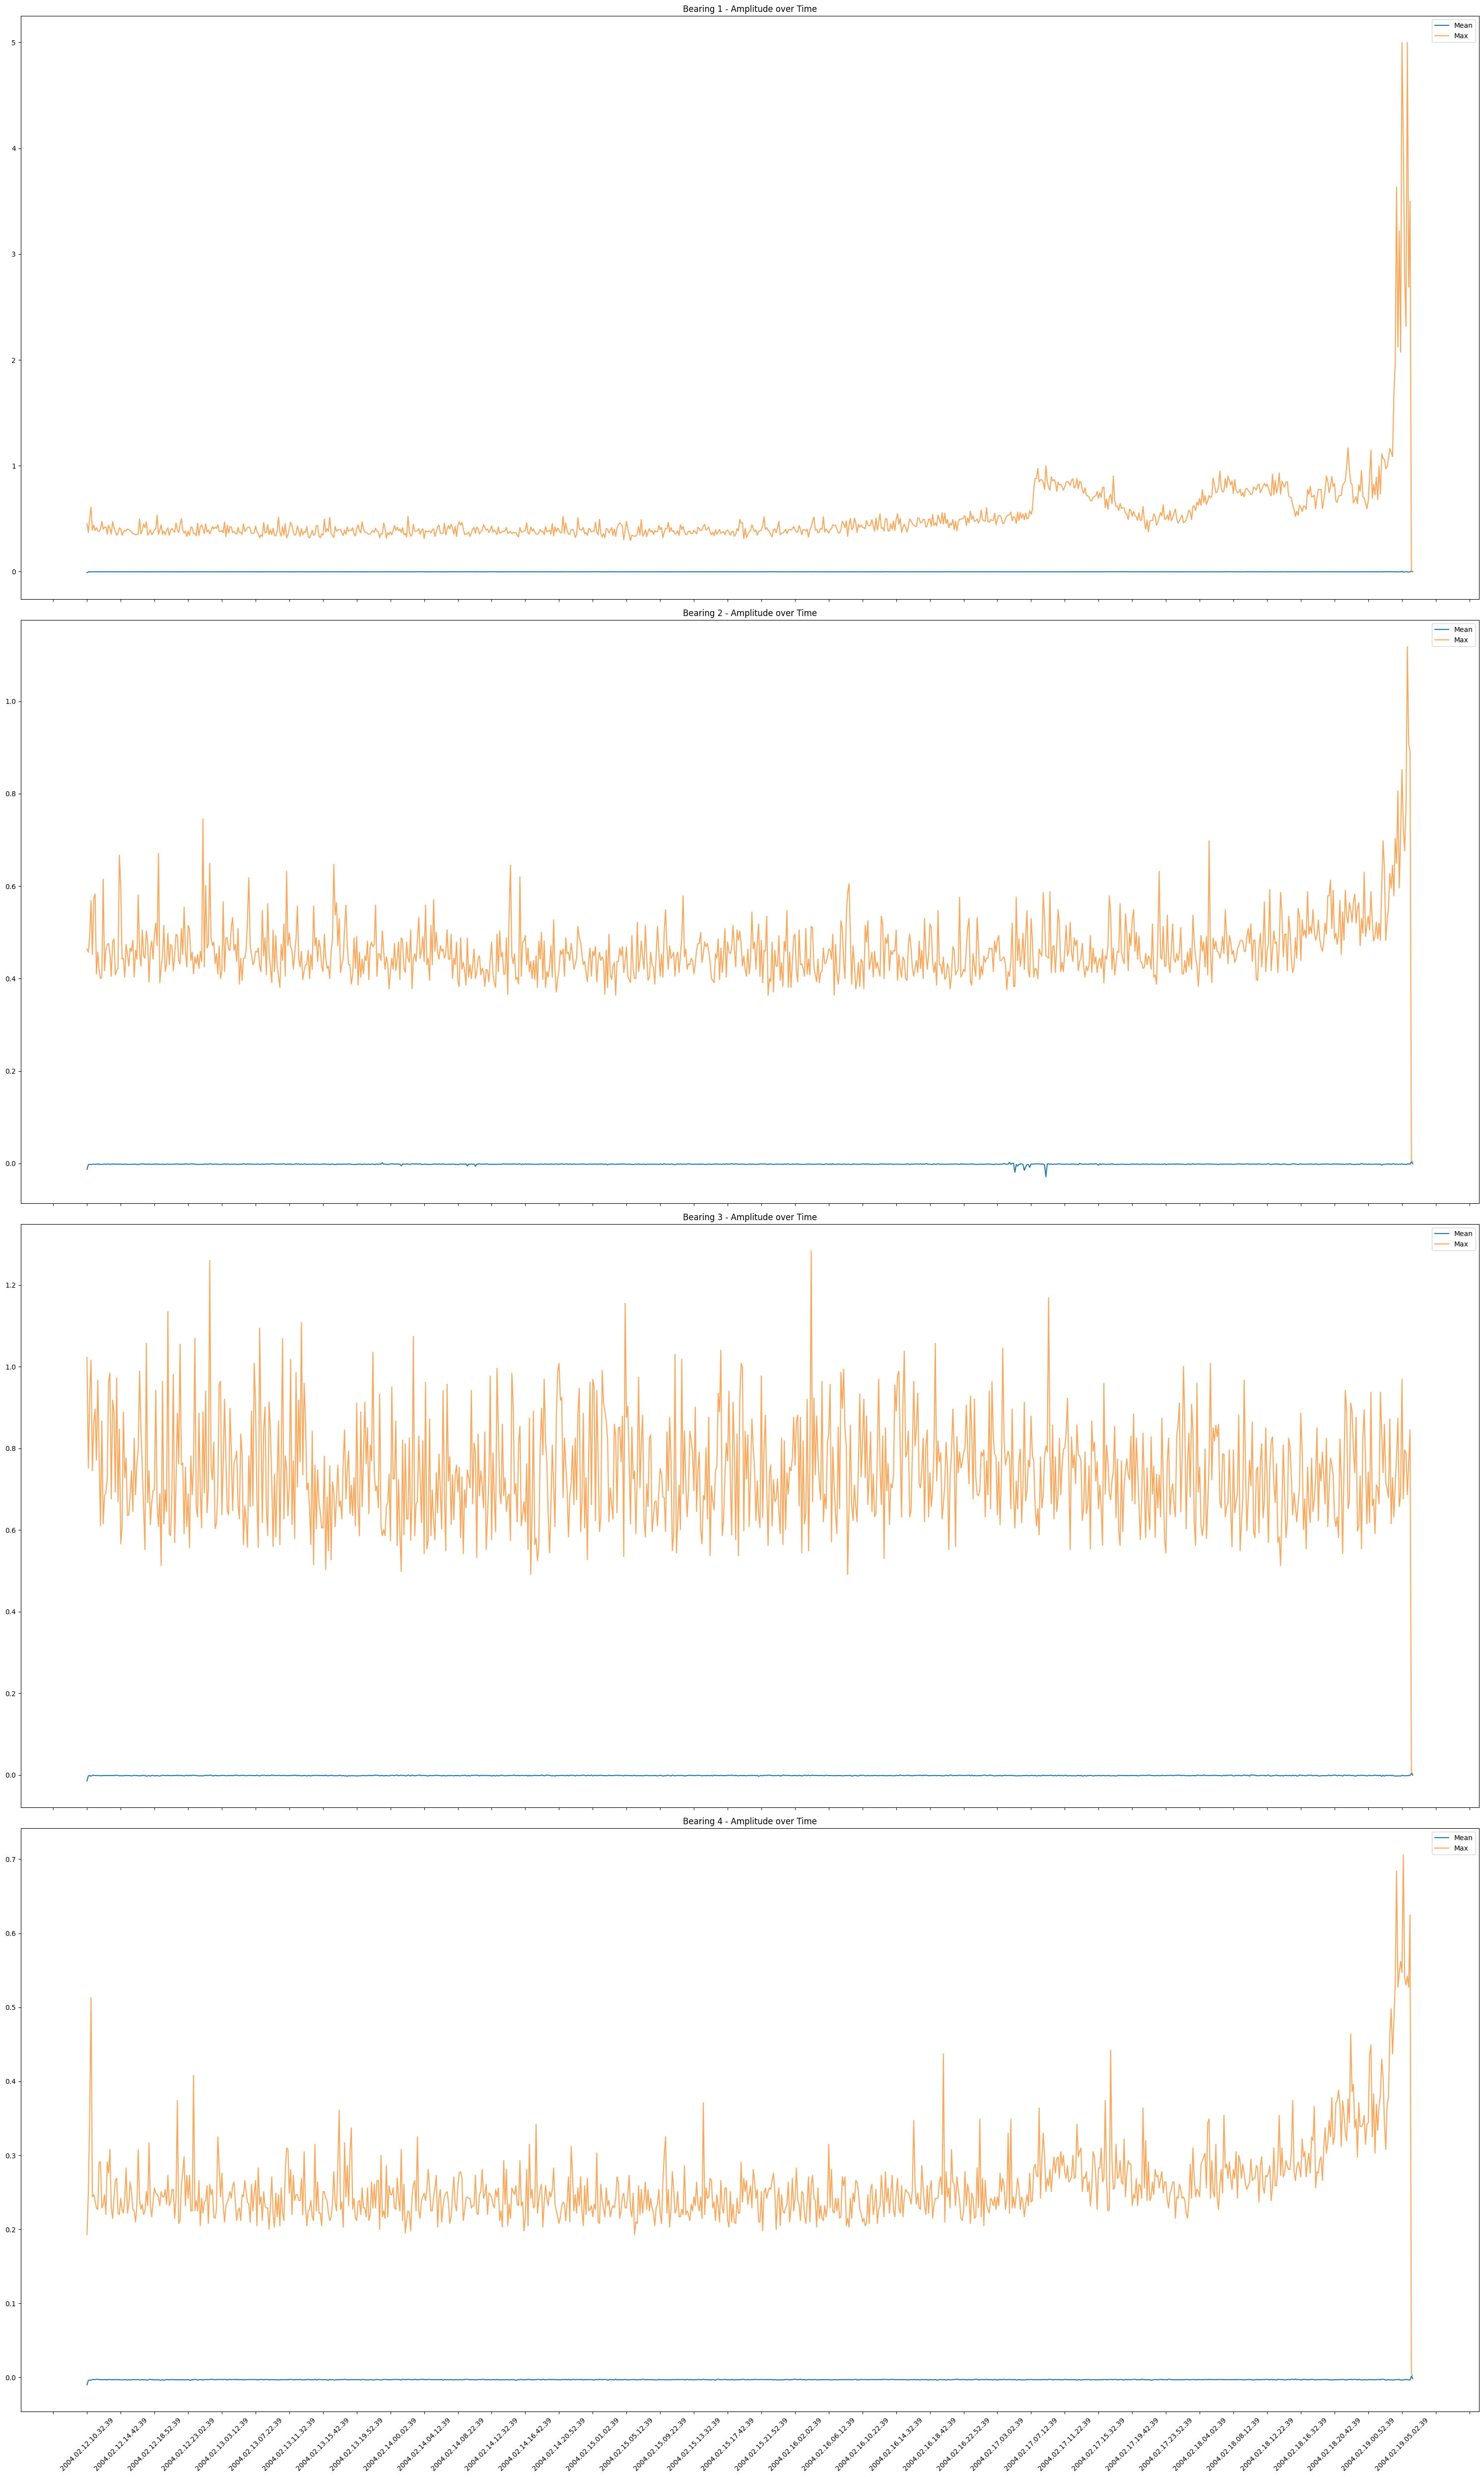

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, axes = plt.subplots(4, 1, figsize=(30, 50), sharex=True)
#fig, axes = plt.subplots(2, 2, figsize=(20, 14))
axes = axes.flatten()

for i in range(1, 5):
    bearing_data = df2.groupby('timestamp')[f'bearing{i}'].agg(['mean', 'std', 'max']).reset_index()
    ax = axes[i-1]
    ax.plot(bearing_data['timestamp'], bearing_data['mean'], label='Mean')
    ax.plot(bearing_data['timestamp'], bearing_data['max'], label='Max', alpha=0.7)
    ax.xaxis.set_major_locator(MaxNLocator(nbins=50))
    ax.set_title(f'Bearing {i} - Amplitude over Time')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

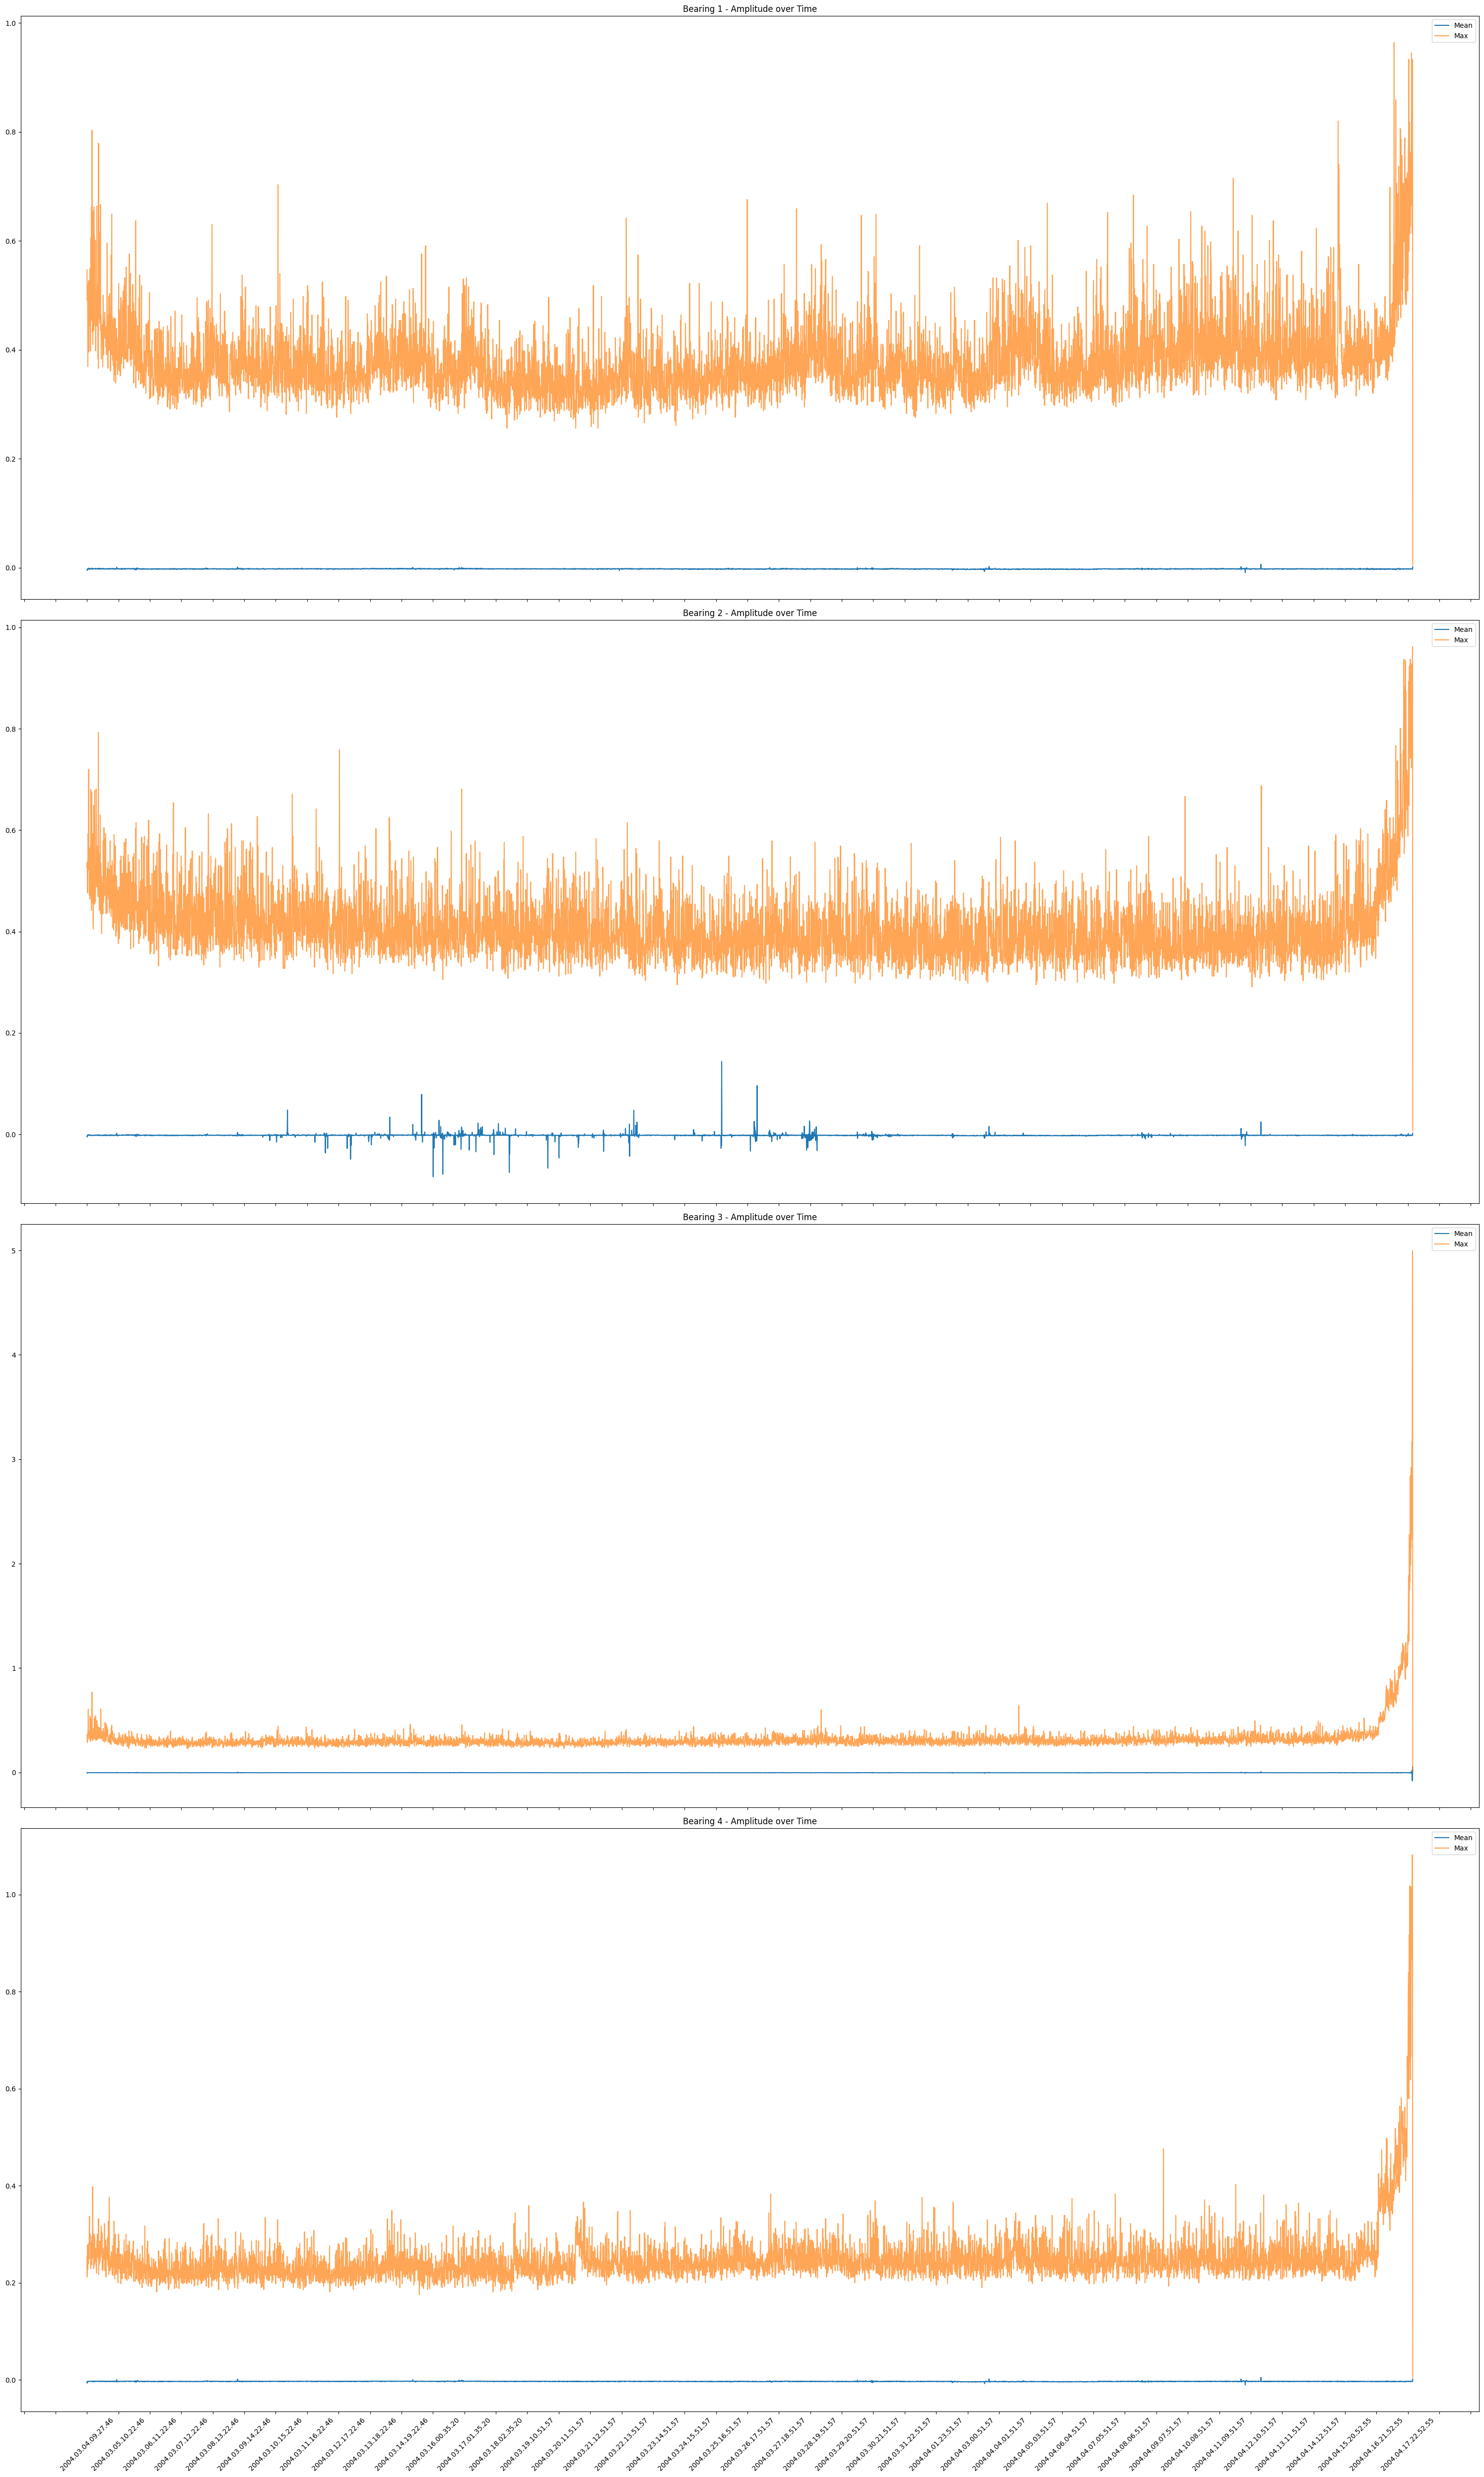

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, axes = plt.subplots(4, 1, figsize=(30, 50), sharex=True)
#fig, axes = plt.subplots(2, 2, figsize=(20, 14))
axes = axes.flatten()

for i in range(1, 5):
    bearing_data = df3.groupby('timestamp')[f'bearing{i}'].agg(['mean', 'std', 'max']).reset_index()
    ax = axes[i-1]
    ax.plot(bearing_data['timestamp'], bearing_data['mean'], label='Mean')
    ax.plot(bearing_data['timestamp'], bearing_data['max'], label='Max', alpha=0.7)
    ax.xaxis.set_major_locator(MaxNLocator(nbins=50))
    ax.set_title(f'Bearing {i} - Amplitude over Time')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

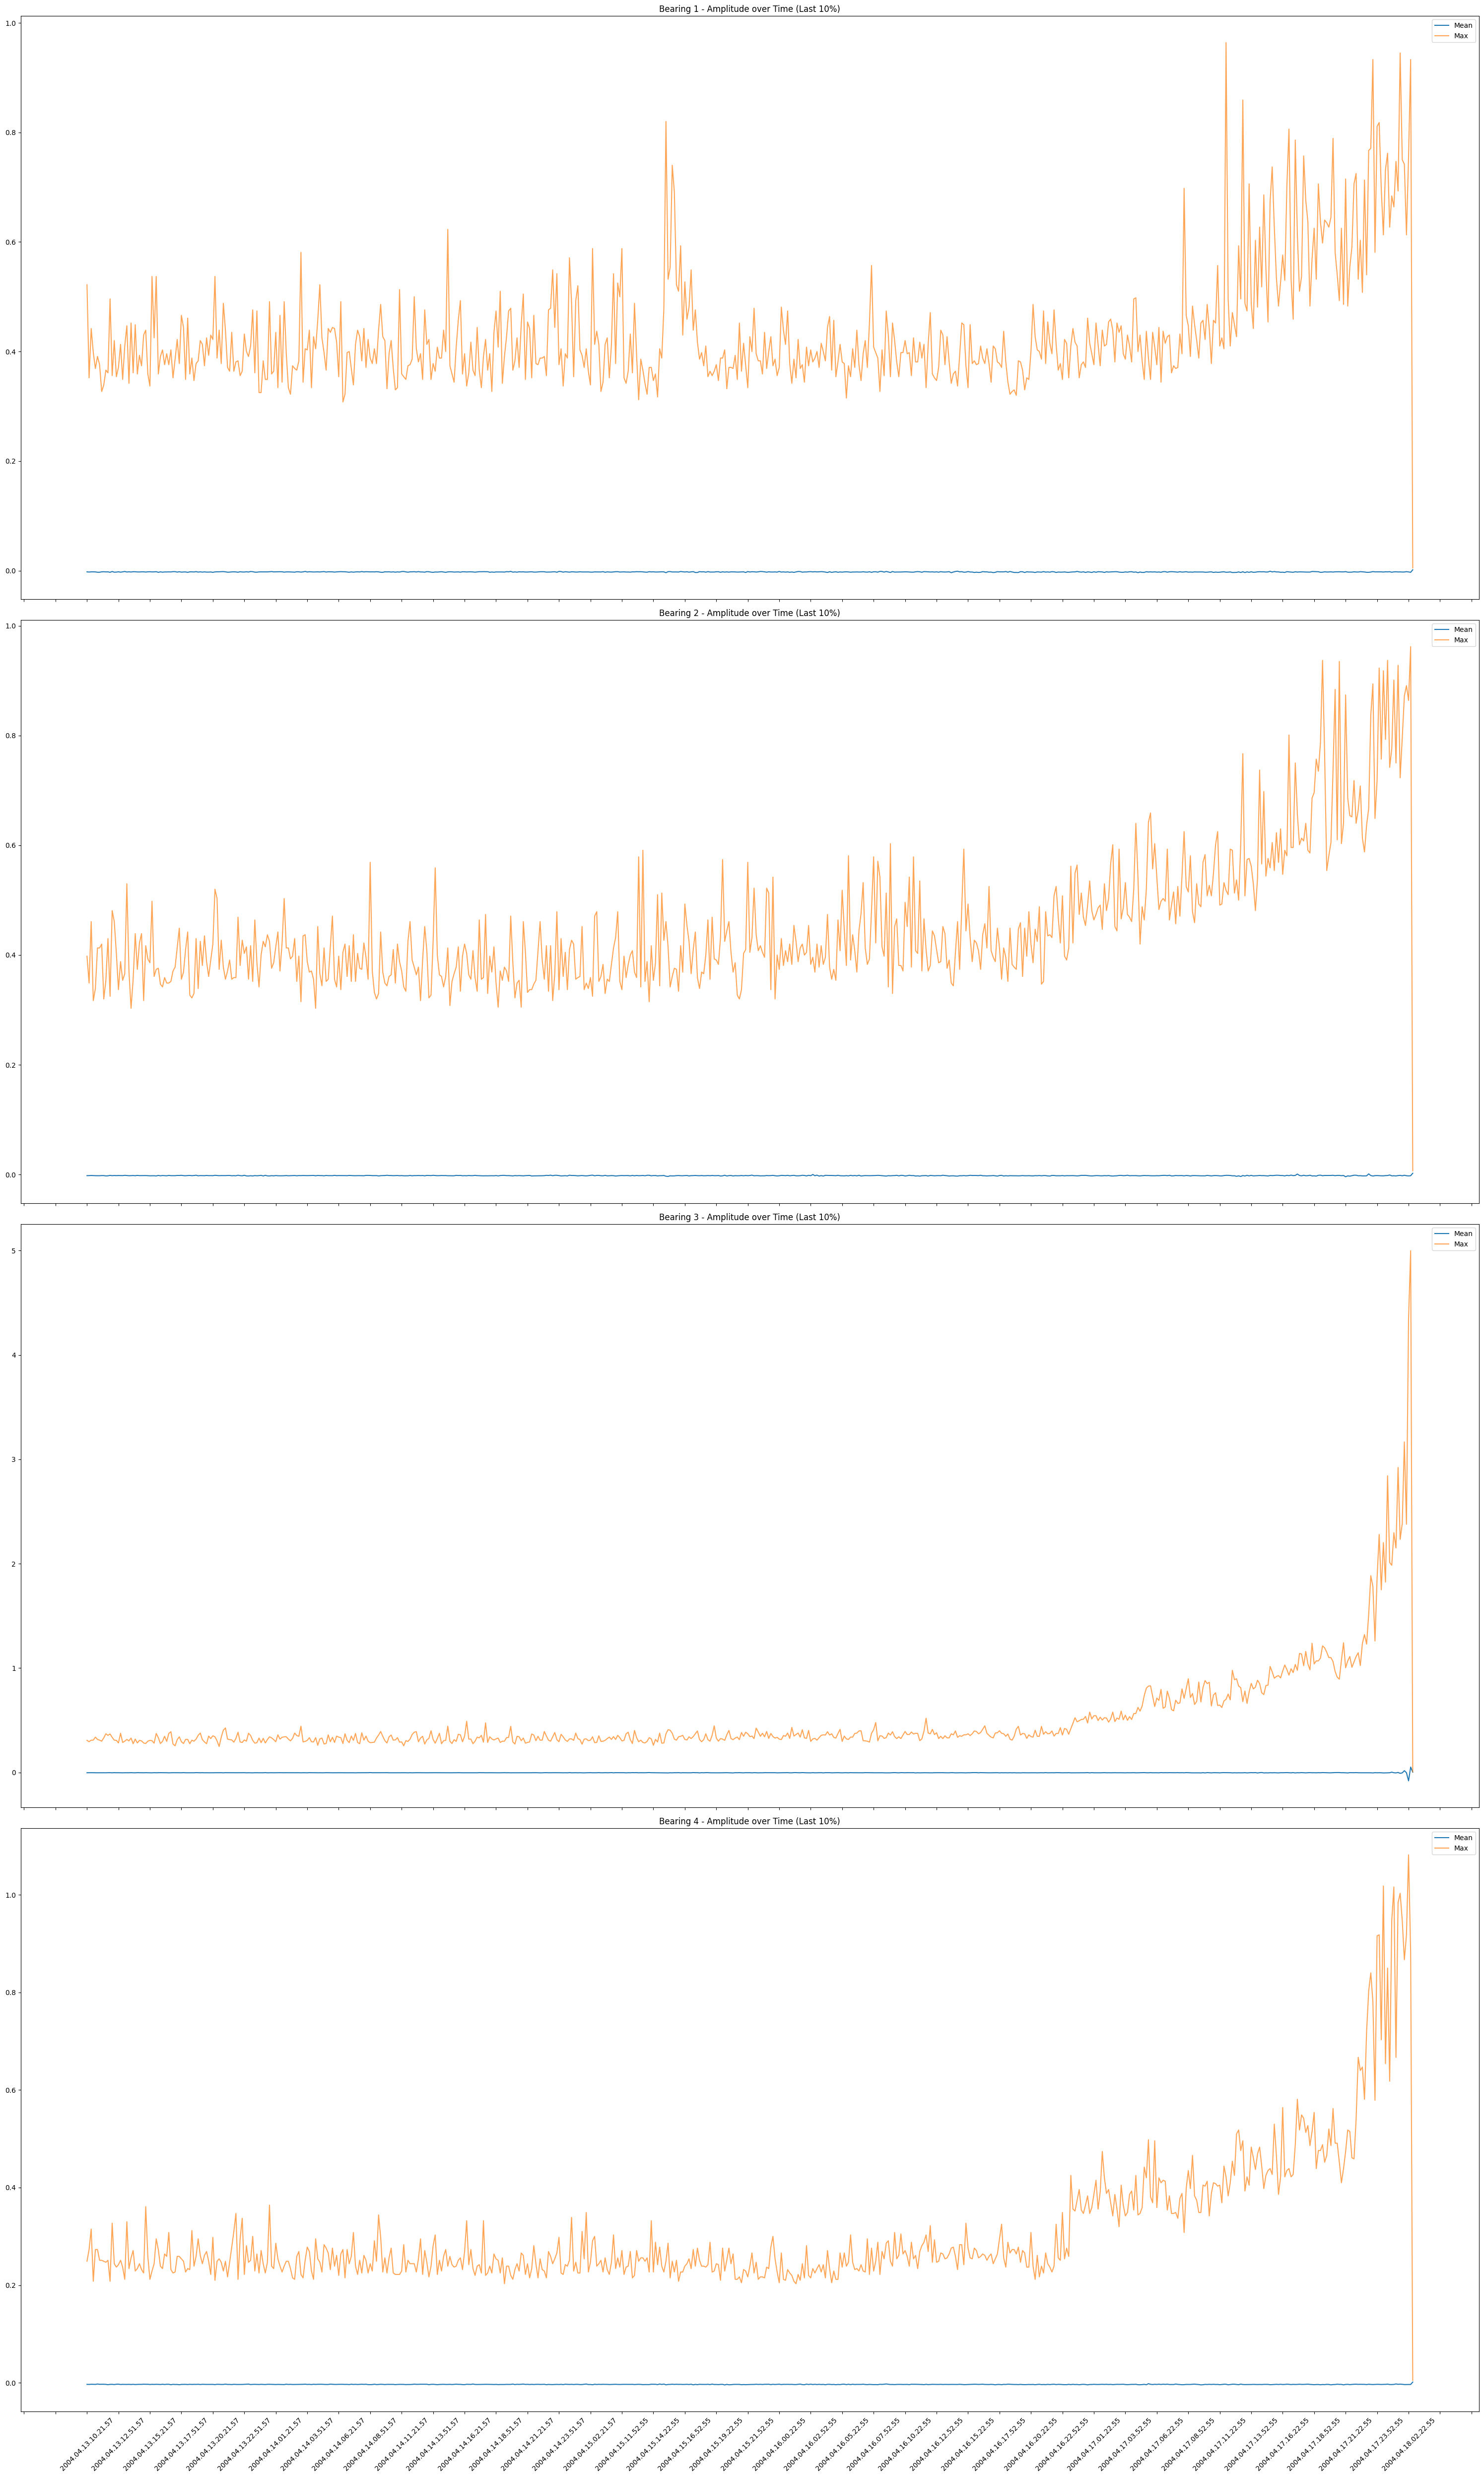

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, axes = plt.subplots(4, 1, figsize=(30, 50), sharex=True)
axes = axes.flatten()

for i in range(1, 5):
    bearing_data = df3.groupby('timestamp')[f'bearing{i}'].agg(['mean', 'std', 'max']).reset_index()
    
    # Calculate the index for the last 10% of data
    total_points = len(bearing_data)
    start_index = int(total_points * 0.9)  # Start at 90% to show last 10%
    
    # Slice the data to show only the last 10%
    zoomed_data = bearing_data.iloc[start_index:]
    
    ax = axes[i-1]
    ax.plot(zoomed_data['timestamp'], zoomed_data['mean'], label='Mean')
    ax.plot(zoomed_data['timestamp'], zoomed_data['max'], label='Max', alpha=0.7)
    ax.xaxis.set_major_locator(MaxNLocator(nbins=50))
    ax.set_title(f'Bearing {i} - Amplitude over Time (Last 10%)')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [12]:
df3.tail(50)

index            timestamp  bearing1  bearing2  bearing3  \
129515470  129515470  2004.04.18.02.42.55     0.005     0.002     0.005   
129515471  129515471  2004.04.18.02.42.55     0.002     0.005     0.005   
129515472  129515472  2004.04.18.02.42.55     0.002     0.002     0.005   
129515473  129515473  2004.04.18.02.42.55     0.002     0.005     0.005   
129515474  129515474  2004.04.18.02.42.55     0.002     0.002     0.005   
129515475  129515475  2004.04.18.02.42.55     0.002     0.005     0.005   
129515476  129515476  2004.04.18.02.42.55     0.002     0.005     0.007   
129515477  129515477  2004.04.18.02.42.55     0.002     0.002     0.005   
129515478  129515478  2004.04.18.02.42.55     0.002     0.002     0.005   
129515479  129515479  2004.04.18.02.42.55     0.002     0.002     0.005   
129515480  129515480  2004.04.18.02.42.55     0.002     0.005     0.005   
129515481  129515481  2004.04.18.02.42.55     0.005     0.002     0.005   
129515482  129515482  2004.04.18.02.42.55     0.002     0.002     0.005   
129515483  129515483  2004.04.18.02.42.55     0.005     0.002     0.005   
129515484  129515484  2004.04.18.02.42.55     0.002     0.005     0.005   
129515485  129515485  2004.04.18.02.42.55     0.005     0.002     0.005   
129515486  129515486  2004.04.18.02.42.55     0.002     0.005     0.005   
129515487  129515487  2004.04.18.02.42.55     0.002     0.005     0.007   
129515488  129515488  2004.04.18.02.42.55     0.002     0.005     0.005   
129515489  129515489  2004.04.18.02.42.55     0.002     0.002     0.005   
129515490  129515490  2004.04.18.02.42.55     0.002     0.002     0.005   
129515491  129515491  2004.04.18.02.42.55     0.002     0.002     0.005   
129515492  129515492  2004.04.18.02.42.55     0.002     0.005     0.005   
129515493  129515493  2004.04.18.02.42.55     0.002     0.002     0.005   
129515494  129515494  2004.04.18.02.42.55     0.005     0.002     0.005   
129515495  129515495  2004.04.18.02.42.55     0.002     0.002     0.005   
129515496  129515496  2004.04.18.02.42.55     0.002     0.005     0.005   
129515497  129515497  2004.04.18.02.42.55     0.002     0.005     0.002   
129515498  129515498  2004.04.18.02.42.55     0.002     0.005     0.002   
129515499  129515499  2004.04.18.02.42.55     0.002     0.005     0.005   
129515500  129515500  2004.04.18.02.42.55     0.002     0.002     0.005   
129515501  129515501  2004.04.18.02.42.55     0.002     0.005     0.002   
129515502  129515502  2004.04.18.02.42.55     0.002     0.002     0.005   
129515503  129515503  2004.04.18.02.42.55     0.002     0.002     0.005   
129515504  129515504  2004.04.18.02.42.55     0.000     0.002     0.005   
129515505  129515505  2004.04.18.02.42.55     0.002     0.005     0.002   
129515506  129515506  2004.04.18.02.42.55     0.002     0.002     0.005   
129515507  129515507  2004.04.18.02.42.55     0.002     0.002     0.005   
129515508  129515508  2004.04.18.02.42.55     0.002     0.002     0.005   
129515509  129515509  2004.04.18.02.42.55     0.002     0.002     0.002   
129515510  129515510  2004.04.18.02.42.55     0.002     0.005     0.002   
129515511  129515511  2004.04.18.02.42.55     0.002     0.002     0.005   
129515512  129515512  2004.04.18.02.42.55     0.002     0.005     0.005   
129515513  129515513  2004.04.18.02.42.55     0.002     0.005     0.005   
129515514  129515514  2004.04.18.02.42.55     0.002     0.002     0.005   
129515515  129515515  2004.04.18.02.42.55     0.000     0.002     0.005   
129515516  129515516  2004.04.18.02.42.55     0.000     0.002     0.002   
129515517  129515517  2004.04.18.02.42.55     0.000     0.002     0.005   
129515518  129515518  2004.04.18.02.42.55     0.002     0.002     0.002   
129515519  129515519  2004.04.18.02.42.55     0.000     0.002     0.005   

           bearing4  
129515470     0.000  
129515471     0.000  
129515472     0.002  
129515473     0.002  
129515474     0.000  
129515475     0.000  
129515476     0.002  
129515477    

### Reading from the plots the time windows where each bearing is healthy, near failure and failure
***df1_bearing3_ch5_features and df1_bearing3_ch6_features***\
0: start to 2003.11.21.17.16.56\
1: 2003.11.22.18.16.56 - 2003.11.24.19.47.32\
***df1_bearing4_ch7_features and df1_bearing4_ch8_features***\
0: start to 2003.11.17.19.42.30\
1: 2003.11.20.18.59.03 - 2003.11.24.19.47.32\
***df2_bearing1***\
0: start to 2004.02.16.22.52.39\
1: 2004.02.17.07.12.39 - 2004.02.19.00.52.39\
***df3_bearing3***\
0: start to 2004.02.16.17.52.55\
1: 2004.04.17.03.52.55 - 2004.04.17.23.52.55\
***df1 general healthy***\
0: start -2003.11.17.19.42.30\
***df2 general healthy***\
0: start -2004.02.16.22.52.39\
***df3 general healthy***\
0: start -2004.04.16.07.52.55

## Feature extraction (RMS, kurtosis, Crest factor,Spectral entropy and Dominant frequency for each segment)

In [13]:
import numpy as np
import pandas as pd
from scipy import stats

# ---------- Feature functions ----------
def spectral_entropy(signal, sampling_rate=20000):
    fft_vals = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(signal), 1/sampling_rate)
    positive_idx = freqs > 0
    power_spectrum = np.abs(fft_vals[positive_idx])**2
    total_power = np.sum(power_spectrum)
    if total_power == 0:
        return np.nan
    normalized_spectrum = power_spectrum / total_power
    normalized_spectrum = np.maximum(normalized_spectrum, 1e-12)  # avoid log(0)
    return -np.sum(normalized_spectrum * np.log2(normalized_spectrum))

def dominant_frequency(signal, sampling_rate=20000):
    fft_vals = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(signal), 1/sampling_rate)
    positive_idx = freqs > 0
    power_spectrum = np.abs(fft_vals[positive_idx])**2
    if len(power_spectrum) == 0:
        return np.nan
    dominant_idx = np.argmax(power_spectrum)
    return freqs[positive_idx][dominant_idx]

# ---------- General feature extraction ----------
def extract_features(df, col, name_prefix):
    grouped = df.groupby('timestamp')[col]
    
    result_df = pd.DataFrame({'timestamp': list(grouped.groups.keys())})
    result_df[f'{name_prefix}_rms'] = grouped.apply(lambda x: np.sqrt(np.mean(x**2))).values
    result_df[f'{name_prefix}_kurtosis'] = grouped.apply(lambda x: stats.kurtosis(x, fisher=True)).values
    result_df[f'{name_prefix}_crest_factor'] = grouped.apply(lambda x: np.max(np.abs(x)) / np.sqrt(np.mean(x**2))).values
    result_df[f'{name_prefix}_spectral_entropy'] = grouped.apply(spectral_entropy).values
    result_df[f'{name_prefix}_dominant_frequency'] = grouped.apply(dominant_frequency).values
    
    return result_df

# ---------- Build all 16 DataFrames ----------
feature_dfs = {}

# df1 → 8 channels
channels_df1 = [
    'bearing1_ch1', 'bearing1_ch2',
    'bearing2_ch3', 'bearing2_ch4',
    'bearing3_ch5', 'bearing3_ch6',
    'bearing4_ch7', 'bearing4_ch8'
]
for col in channels_df1:
    df_name = f"df1_{col}_features"
    feature_dfs[df_name] = extract_features(df1, col, col)

# df2 → 4 bearings
for i in range(1, 5):
    col = f"bearing{i}"
    df_name = f"df2_{col}_features"
    feature_dfs[df_name] = extract_features(df2, col, col)

# df3 → 4 bearings
for i in range(1, 5):
    col = f"bearing{i}"
    df_name = f"df3_{col}_features"
    feature_dfs[df_name] = extract_features(df3, col, col)

# Now you have 16 separate DataFrames in the dictionary feature_dfs
# Example: feature_dfs["df1_bearing1_ch1_features"].head()


In [14]:
feature_dfs["df2_bearing1_features"].head()

timestamp  bearing1_rms  bearing1_kurtosis  \
0  2004.02.12.10.32.39      0.074179           0.628763   
1  2004.02.12.10.42.39      0.075382           0.648291   
2  2004.02.12.10.52.39      0.076230           0.513475   
3  2004.02.12.11.02.39      0.078724           1.157953   
4  2004.02.12.11.12.39      0.078474           0.603177   

   bearing1_crest_factor  bearing1_spectral_entropy  \
0               6.120331                  10.607412   
1               5.147086                  11.024856   
2               6.598472                  10.963761   
3               7.723217                  10.998109   
4               4.982524                  10.922098   

   bearing1_dominant_frequency  
0                   985.351562  
1                   985.351562  
2                   985.351562  
3                   985.351562  
4                   985.351562

## Normalization

In [15]:
from sklearn.preprocessing import StandardScaler

normalized_dfs = {}

for name, df in feature_dfs.items():
    # keep timestamp aside
    timestamps = df['timestamp'].values
    
    # detect feature columns (all except timestamp)
    feature_columns = [col for col in df.columns if col != 'timestamp']
    
    # scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[feature_columns])
    
    # rebuild DataFrame
    X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns, index=df.index)
    X_scaled_df['timestamp'] = timestamps
    
    # save normalized df
    normalized_dfs[name] = X_scaled_df

# Example: normalized_dfs["df1_bearing1_ch1_features"].head()


In [16]:
import os

# Make sure you have a folder to store them
output_dir = "normalized_bearings"
os.makedirs(output_dir, exist_ok=True)

# Save each normalized dataframe to CSV
for name, df in normalized_dfs.items():
    file_path = os.path.join(output_dir, f"{name}.csv")
    df.to_csv(file_path, index=False)
    print(f"Saved: {file_path}")


Saved: normalized_bearings/df1_bearing1_ch1_features.csv
Saved: normalized_bearings/df1_bearing1_ch2_features.csv
Saved: normalized_bearings/df1_bearing2_ch3_features.csv
Saved: normalized_bearings/df1_bearing2_ch4_features.csv
Saved: normalized_bearings/df1_bearing3_ch5_features.csv
Saved: normalized_bearings/df1_bearing3_ch6_features.csv
Saved: normalized_bearings/df1_bearing4_ch7_features.csv
Saved: normalized_bearings/df1_bearing4_ch8_features.csv
Saved: normalized_bearings/df2_bearing1_features.csv
Saved: normalized_bearings/df2_bearing2_features.csv
Saved: normalized_bearings/df2_bearing3_features.csv
Saved: normalized_bearings/df2_bearing4_features.csv
Saved: normalized_bearings/df3_bearing1_features.csv
Saved: normalized_bearings/df3_bearing2_features.csv
Saved: normalized_bearings/df3_bearing3_features.csv
Saved: normalized_bearings/df3_bearing4_features.csv


In [17]:
normalized_dfs["df1_bearing3_ch5_features"].head()

bearing3_ch5_rms  bearing3_ch5_kurtosis  bearing3_ch5_crest_factor  \
0         -1.404872              -0.294089                  -0.749561   
1         -1.387942              -0.277844                  -0.143750   
2         -1.473794              -0.279811                  -0.548704   
3         -1.477916              -0.296020                  -0.260474   
4         -1.413450              -0.285762                  -0.420460   

   bearing3_ch5_spectral_entropy  bearing3_ch5_dominant_frequency  \
0                      -3.045741                         -0.08463   
1                      -4.067255                         -0.08463   
2                      -2.015796                         -0.08463   
3                      -3.425314                         -0.08463   
4                      -3.459451                         -0.08463   

             timestamp  
0  2003.10.22.15.44.13  
1  2003.10.22.15.54.13  
2  2003.10.22.16.04.13  
3  2003.10.22.16.14.13  
4  2003.10.22.16.24.13

## Label Alignment: separting the data into healthy, degraded
Dataset1: Bearing 3 and 4 with two channels\
Dataset2: Bearing 1\
Dataset3: bearing 3

In [18]:
# List all normalized DataFrame names
df_names = list(normalized_dfs.keys())
print(df_names)


['df1_bearing1_ch1_features', 'df1_bearing1_ch2_features', 'df1_bearing2_ch3_features', 'df1_bearing2_ch4_features', 'df1_bearing3_ch5_features', 'df1_bearing3_ch6_features', 'df1_bearing4_ch7_features', 'df1_bearing4_ch8_features', 'df2_bearing1_features', 'df2_bearing2_features', 'df2_bearing3_features', 'df2_bearing4_features', 'df3_bearing1_features', 'df3_bearing2_features', 'df3_bearing3_features', 'df3_bearing4_features']


### Dataset 1 Bearing 3

In [19]:
normalized_dfs["df1_bearing3_ch5_features"].head()

bearing3_ch5_rms  bearing3_ch5_kurtosis  bearing3_ch5_crest_factor  \
0         -1.404872              -0.294089                  -0.749561   
1         -1.387942              -0.277844                  -0.143750   
2         -1.473794              -0.279811                  -0.548704   
3         -1.477916              -0.296020                  -0.260474   
4         -1.413450              -0.285762                  -0.420460   

   bearing3_ch5_spectral_entropy  bearing3_ch5_dominant_frequency  \
0                      -3.045741                         -0.08463   
1                      -4.067255                         -0.08463   
2                      -2.015796                         -0.08463   
3                      -3.425314                         -0.08463   
4                      -3.459451                         -0.08463   

             timestamp  
0  2003.10.22.15.44.13  
1  2003.10.22.15.54.13  
2  2003.10.22.16.04.13  
3  2003.10.22.16.14.13  
4  2003.10.22.16.24.13

In [20]:
labeled_dfs = {}
labeled_dfs["labeled_df1_bearing3_ch5"] = normalized_dfs["df1_bearing3_ch5_features"].copy()
labeled_dfs["labeled_df1_bearing3_ch5"].loc[labeled_dfs["labeled_df1_bearing3_ch5"]['timestamp'].between('2003.10.22.15.44.13', '2003.11.21.17.16.56'), 'health_state'] = 0
labeled_dfs["labeled_df1_bearing3_ch5"].loc[labeled_dfs["labeled_df1_bearing3_ch5"]['timestamp'].between('2003.11.22.18.16.56', '2003.11.24.19.47.32'), 'health_state'] = 1
labeled_dfs["labeled_df1_bearing3_ch5"] = labeled_dfs["labeled_df1_bearing3_ch5"].dropna(subset=['health_state'])
labeled_dfs["labeled_df1_bearing3_ch5"] = labeled_dfs["labeled_df1_bearing3_ch5"].drop('timestamp', axis=1)

In [21]:
labeled_dfs["labeled_df1_bearing3_ch5"].head()

bearing3_ch5_rms  bearing3_ch5_kurtosis  bearing3_ch5_crest_factor  \
0         -1.404872              -0.294089                  -0.749561   
1         -1.387942              -0.277844                  -0.143750   
2         -1.473794              -0.279811                  -0.548704   
3         -1.477916              -0.296020                  -0.260474   
4         -1.413450              -0.285762                  -0.420460   

   bearing3_ch5_spectral_entropy  bearing3_ch5_dominant_frequency  \
0                      -3.045741                         -0.08463   
1                      -4.067255                         -0.08463   
2                      -2.015796                         -0.08463   
3                      -3.425314                         -0.08463   
4                      -3.459451                         -0.08463   

   health_state  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [22]:
labeled_dfs["labeled_df1_bearing3_ch6"] = normalized_dfs["df1_bearing3_ch6_features"].copy()
labeled_dfs["labeled_df1_bearing3_ch6"].loc[labeled_dfs["labeled_df1_bearing3_ch6"]['timestamp'].between('2003.10.22.15.44.13', '2003.11.21.17.16.56'), 'health_state'] = 0
labeled_dfs["labeled_df1_bearing3_ch6"].loc[labeled_dfs["labeled_df1_bearing3_ch6"]['timestamp'].between('2003.11.22.18.16.56', '2003.11.24.19.47.32'), 'health_state'] = 1
labeled_dfs["labeled_df1_bearing3_ch6"] = labeled_dfs["labeled_df1_bearing3_ch6"].dropna(subset=['health_state'])
labeled_dfs["labeled_df1_bearing3_ch6"] = labeled_dfs["labeled_df1_bearing3_ch6"].drop('timestamp', axis=1)

In [23]:
labeled_dfs["labeled_df1_bearing3_ch6"].tail()

bearing3_ch6_rms  bearing3_ch6_kurtosis  bearing3_ch6_crest_factor  \
2046          0.720373               0.224614                   1.093046   
2047          0.843879               0.858109                   1.468642   
2048          0.695732              -0.013396                   1.920885   
2049          0.745252              -0.078640                   0.316525   
2050          0.704251               0.089010                   0.898094   

      bearing3_ch6_spectral_entropy  bearing3_ch6_dominant_frequency  \
2046                      -0.240867                        -0.632153   
2047                      -1.999419                        -0.632153   
2048                      -1.042157                        -1.022001   
2049                      -1.343057                        -0.632153   
2050                      -1.402633                        -0.631915   

      health_state  
2046           1.0  
2047           1.0  
2048           1.0  
2049           1.0  
2050           1.0

### Dataset 1 bearing 4

In [24]:
labeled_dfs["labeled_df1_bearing4_ch7"] = normalized_dfs["df1_bearing4_ch7_features"].copy()
labeled_dfs["labeled_df1_bearing4_ch7"].loc[labeled_dfs["labeled_df1_bearing4_ch7"]['timestamp'].between('2003.10.22.15.44.13', '2003.11.17.19.42.30'), 'health_state'] = 0
labeled_dfs["labeled_df1_bearing4_ch7"].loc[labeled_dfs["labeled_df1_bearing4_ch7"]['timestamp'].between('2003.11.20.18.59.03', '2003.11.24.19.47.32'), 'health_state'] = 1
labeled_dfs["labeled_df1_bearing4_ch7"] = labeled_dfs["labeled_df1_bearing4_ch7"].dropna(subset=['health_state'])
labeled_dfs["labeled_df1_bearing4_ch7"] = labeled_dfs["labeled_df1_bearing4_ch7"].drop('timestamp', axis=1)

In [25]:
labeled_dfs["labeled_df1_bearing4_ch7"].tail()

bearing4_ch7_rms  bearing4_ch7_kurtosis  bearing4_ch7_crest_factor  \
2046          0.998124              -0.246647                   0.010877   
2047          1.085865              -0.274478                  -0.424623   
2048          1.240136              -0.246600                  -0.011332   
2049          1.122620              -0.234125                  -0.141554   
2050          1.129902              -0.268325                   0.016289   

      bearing4_ch7_spectral_entropy  bearing4_ch7_dominant_frequency  \
2046                       1.412912                        -0.399800   
2047                       1.069142                        -0.399800   
2048                       1.262803                        -0.398823   
2049                       0.944887                        -0.399800   
2050                       0.570391                        -0.398823   

      health_state  
2046           1.0  
2047           1.0  
2048           1.0  
2049           1.0  
2050           1.0

In [26]:
labeled_dfs["labeled_df1_bearing4_ch8"] = normalized_dfs["df1_bearing4_ch8_features"].copy()
labeled_dfs["labeled_df1_bearing4_ch8"].loc[labeled_dfs["labeled_df1_bearing4_ch8"]['timestamp'].between('2003.10.22.15.44.13', '2003.11.17.19.42.30'), 'health_state'] = 0
labeled_dfs["labeled_df1_bearing4_ch8"].loc[labeled_dfs["labeled_df1_bearing4_ch8"]['timestamp'].between('2003.11.20.18.59.03', '2003.11.24.19.47.32'), 'health_state'] = 1
labeled_dfs["labeled_df1_bearing4_ch8"] = labeled_dfs["labeled_df1_bearing4_ch8"].dropna(subset=['health_state'])
labeled_dfs["labeled_df1_bearing4_ch8"] = labeled_dfs["labeled_df1_bearing4_ch8"].drop('timestamp', axis=1)

In [27]:
labeled_dfs["labeled_df1_bearing4_ch8"].tail()

bearing4_ch8_rms  bearing4_ch8_kurtosis  bearing4_ch8_crest_factor  \
2046          1.261854              -0.329711                  -0.206319   
2047          1.380785              -0.194561                   0.762620   
2048          1.558878              -0.148872                   0.632123   
2049          1.311355              -0.324740                  -0.243930   
2050          1.383611              -0.234338                   0.024520   

      bearing4_ch8_spectral_entropy  bearing4_ch8_dominant_frequency  \
2046                       0.047569                         1.259698   
2047                       0.085114                         1.259698   
2048                       0.242773                         1.261223   
2049                      -0.124647                         1.259698   
2050                       0.096974                         1.624329   

      health_state  
2046           1.0  
2047           1.0  
2048           1.0  
2049           1.0  
2050           1.0

### Dataset 2 bearing 1

In [28]:
normalized_dfs["df2_bearing1_features"].head()

bearing1_rms  bearing1_kurtosis  bearing1_crest_factor  \
0     -0.548710          -0.205508               1.643400   
1     -0.528030          -0.185277              -0.046506   
2     -0.513470          -0.324940               2.473626   
3     -0.470615           0.342708               4.426592   
4     -0.474901          -0.232013              -0.332247   

   bearing1_spectral_entropy  bearing1_dominant_frequency            timestamp  
0                   0.485236                    -0.419111  2004.02.12.10.32.39  
1                   1.155730                    -0.419111  2004.02.12.10.42.39  
2                   1.057599                    -0.419111  2004.02.12.10.52.39  
3                   1.112768                    -0.419111  2004.02.12.11.02.39  
4                   0.990680                    -0.419111  2004.02.12.11.12.39

In [29]:
labeled_dfs["labeled_df2_bearing1"] = normalized_dfs["df2_bearing1_features"].copy()
labeled_dfs["labeled_df2_bearing1"].loc[labeled_dfs["labeled_df2_bearing1"]['timestamp'].between('2004.02.12.10.32.39', '2004.02.16.22.52.39'), 'health_state'] = 0
labeled_dfs["labeled_df2_bearing1"].loc[labeled_dfs["labeled_df2_bearing1"]['timestamp'].between('2004.02.17.07.12.39', '2004.02.19.00.52.39'), 'health_state'] = 1
labeled_dfs["labeled_df2_bearing1"] = labeled_dfs["labeled_df2_bearing1"].dropna(subset=['health_state'])
labeled_dfs["labeled_df2_bearing1"] = labeled_dfs["labeled_df2_bearing1"].drop('timestamp', axis=1)

In [30]:
labeled_dfs["labeled_df2_bearing1"].head()

bearing1_rms  bearing1_kurtosis  bearing1_crest_factor  \
0     -0.548710          -0.205508               1.643400   
1     -0.528030          -0.185277              -0.046506   
2     -0.513470          -0.324940               2.473626   
3     -0.470615           0.342708               4.426592   
4     -0.474901          -0.232013              -0.332247   

   bearing1_spectral_entropy  bearing1_dominant_frequency  health_state  
0                   0.485236                    -0.419111           0.0  
1                   1.155730                    -0.419111           0.0  
2                   1.057599                    -0.419111           0.0  
3                   1.112768                    -0.419111           0.0  
4                   0.990680                    -0.419111           0.0

### Dataset 3 bearing 3

In [31]:
normalized_dfs["df3_bearing3_features"].head()

bearing3_rms  bearing3_kurtosis  bearing3_crest_factor  \
0     -0.195107           1.095411               1.283382   
1     -0.198508           0.518748              -0.437168   
2     -0.104177           0.156018              -0.989120   
3     -0.122045           0.367931               0.668425   
4     -0.160014           0.608180               1.829319   

   bearing3_spectral_entropy  bearing3_dominant_frequency            timestamp  
0                   0.967614                     0.309527  2004.03.04.09.27.46  
1                   1.414124                     0.311380  2004.03.04.09.32.46  
2                   0.155150                    -1.119434  2004.03.04.09.42.46  
3                   0.701514                    -1.119434  2004.03.04.09.52.46  
4                   0.852056                     0.313233  2004.03.04.10.02.46

In [32]:
labeled_dfs["labeled_df3_bearing3"] = normalized_dfs["df3_bearing3_features"].copy()
labeled_dfs["labeled_df3_bearing3"].loc[labeled_dfs["labeled_df3_bearing3"]['timestamp'].between('2004.03.04.09.27.46', '2004.02.16.17.52.55'), 'health_state'] = 0
labeled_dfs["labeled_df3_bearing3"].loc[labeled_dfs["labeled_df3_bearing3"]['timestamp'].between('2004.04.17.03.52.55', '2004.04.17.23.52.55'), 'health_state'] = 1
labeled_dfs["labeled_df3_bearing3"] = labeled_dfs["labeled_df3_bearing3"].dropna(subset=['health_state'])
labeled_dfs["labeled_df3_bearing3"] = labeled_dfs["labeled_df3_bearing3"].drop('timestamp', axis=1)

In [33]:
labeled_dfs["labeled_df3_bearing3"].tail()

bearing3_rms  bearing3_kurtosis  bearing3_crest_factor  \
6302      8.366128           4.931874               5.796679   
6303      9.022783          10.300250               6.523733   
6304      8.347825           4.843317               5.603444   
6305      9.344947           2.669708               4.015613   
6306     10.596949          15.843396               7.172695   

      bearing3_spectral_entropy  bearing3_dominant_frequency  health_state  
6302                  -2.549203                     6.798229           1.0  
6303                  -1.201856                     5.897484           1.0  
6304                  -1.485075                     5.897484           1.0  
6305                  -3.764134                     6.774135           1.0  
6306                  -3.386913                     6.800083           1.0

### Dataset 1-3 healhty labeling

In [34]:
# Process bearings 1 and 2 with their respective channels (excluding bearing 3 and 4 as requested)
# Bearing 1 has channels 1,2 and Bearing 2 has channels 3,4
bearing_channels = {
    1: [1, 2],
    2: [3, 4]
}

for bearing, channels in bearing_channels.items():
    for channel in channels:
        # Create the key names
        source_key = f"df1_bearing{bearing}_ch{channel}_features"
        labeled_key = f"labeled_df1_bearing{bearing}_ch{channel}"
        
        # Copy the normalized dataframe
        labeled_dfs[labeled_key] = normalized_dfs[source_key].copy()
        
        # Apply health state labeling based on timestamp
        labeled_dfs[labeled_key].loc[
            labeled_dfs[labeled_key]['timestamp'].between('2003.10.22.15.44.13', '2003.11.17.19.42.30'), 
            'health_state'
        ] = 0
        
        # Drop rows with NaN health_state
        labeled_dfs[labeled_key] = labeled_dfs[labeled_key].dropna(subset=['health_state'])
        
        # Drop the timestamp column
        labeled_dfs[labeled_key] = labeled_dfs[labeled_key].drop('timestamp', axis=1)
        
        print(f"Processed {labeled_key}")

Processed labeled_df1_bearing1_ch1
Processed labeled_df1_bearing1_ch2
Processed labeled_df1_bearing2_ch3
Processed labeled_df1_bearing2_ch4


In [35]:
labeled_dfs["labeled_df1_bearing2_ch3"].tail()

bearing2_ch3_rms  bearing2_ch3_kurtosis  bearing2_ch3_crest_factor  \
1246         -0.134442              -1.003679                  -0.287877   
1247          0.069786              -0.823103                  -0.661834   
1248          0.059052              -0.924087                  -0.480798   
1249          0.039557               2.698001                   1.382577   
1250          0.400042              -0.031251                   0.220314   

      bearing2_ch3_spectral_entropy  bearing2_ch3_dominant_frequency  \
1246                       0.019347                        -0.023325   
1247                       0.449902                        -0.023325   
1248                      -0.268455                        -0.023325   
1249                       0.180048                        -0.023325   
1250                       0.192300                        -0.023325   

      health_state  
1246           0.0  
1247           0.0  
1248           0.0  
1249           0.0  
1250           0.0

In [36]:
# Process bearings 2, 3, and 4 from df2 without channels
bearings = [2, 3, 4]

for bearing in bearings:
    # Create the key names
    source_key = f"df2_bearing{bearing}_features"
    labeled_key = f"labeled_df2_bearing{bearing}"
    
    # Copy the normalized dataframe
    labeled_dfs[labeled_key] = normalized_dfs[source_key].copy()
    
    # Apply health state labeling based on timestamp
    labeled_dfs[labeled_key].loc[
        labeled_dfs[labeled_key]['timestamp'].between('2004.02.12.10.32.39', '2004.02.16.22.52.39'), 
        'health_state'
    ] = 0
    
    # Drop rows with NaN health_state
    labeled_dfs[labeled_key] = labeled_dfs[labeled_key].dropna(subset=['health_state'])
    
    # Drop the timestamp column
    labeled_dfs[labeled_key] = labeled_dfs[labeled_key].drop('timestamp', axis=1)
    
    print(f"Processed {labeled_key}")

Processed labeled_df2_bearing2
Processed labeled_df2_bearing3
Processed labeled_df2_bearing4


In [37]:
labeled_dfs["labeled_df2_bearing1"].tail()

bearing1_rms  bearing1_kurtosis  bearing1_crest_factor  \
946      1.335879           0.060540               0.659018   
947      0.992628          -0.582887              -1.270118   
948      0.897180          -0.518214              -1.350452   
949      0.946707          -0.239160              -0.700625   
950      1.320159           0.087748              -0.270399   

     bearing1_spectral_entropy  bearing1_dominant_frequency  health_state  
946                  -2.070916                    -0.663723           1.0  
947                  -1.988582                    -0.663723           1.0  
948                  -1.563711                    -0.663723           1.0  
949                  -1.595167                    -0.663723           1.0  
950                  -2.293176                    -0.471934           1.0

In [38]:
# Process bearings 1, 2, and 4 from df3 (avoiding bearing 3)
bearings = [1, 2, 4]

for bearing in bearings:
    # Create the key names
    source_key = f"df3_bearing{bearing}_features"
    labeled_key = f"labeled_df3_bearing{bearing}"
    
    # Copy the normalized dataframe
    labeled_dfs[labeled_key] = normalized_dfs[source_key].copy()
    
    # Apply health state labeling based on timestamp
    labeled_dfs[labeled_key].loc[
        labeled_dfs[labeled_key]['timestamp'].between('2004.03.04.09.27.46', '2004.04.16.07.52.55'), 
        'health_state'
    ] = 0
    
    # Drop rows with NaN health_state
    labeled_dfs[labeled_key] = labeled_dfs[labeled_key].dropna(subset=['health_state'])
    
    # Drop the timestamp column
    labeled_dfs[labeled_key] = labeled_dfs[labeled_key].drop('timestamp', axis=1)
    
    print(f"Processed {labeled_key}")

Processed labeled_df3_bearing1
Processed labeled_df3_bearing2
Processed labeled_df3_bearing4


In [39]:
labeled_dfs["labeled_df3_bearing1"].tail()

bearing1_rms  bearing1_kurtosis  bearing1_crest_factor  \
6062      0.421659           0.133922               0.057132   
6063      0.372781           0.165440               1.216614   
6064      0.494220           0.668102               1.165430   
6065      0.426224           1.255662               2.388756   
6066      0.559899           0.238543              -0.227933   

      bearing1_spectral_entropy  bearing1_dominant_frequency  health_state  
6062                   1.142256                    -0.002067           0.0  
6063                   1.456132                    -0.002067           0.0  
6064                   1.558221                    -0.002067           0.0  
6065                   1.672652                    -0.002067           0.0  
6066                   1.296922                    -0.002067           0.0

In [40]:
list(labeled_dfs.keys())

['labeled_df1_bearing3_ch5',
 'labeled_df1_bearing3_ch6',
 'labeled_df1_bearing4_ch7',
 'labeled_df1_bearing4_ch8',
 'labeled_df2_bearing1',
 'labeled_df3_bearing3',
 'labeled_df1_bearing1_ch1',
 'labeled_df1_bearing1_ch2',
 'labeled_df1_bearing2_ch3',
 'labeled_df1_bearing2_ch4',
 'labeled_df2_bearing2',
 'labeled_df2_bearing3',
 'labeled_df2_bearing4',
 'labeled_df3_bearing1',
 'labeled_df3_bearing2',
 'labeled_df3_bearing4']

In [41]:
import re

# Create new dictionary with standardized column names
labeled_dfs_same_name_columns = {}

# Process each dataframe in labeled_dfs
for df_name, df in labeled_dfs.items():
    # Make a copy to avoid modifying the original
    df_copy = df.copy()
    
    # Set standard column names (assuming same order across all dataframes)
    standard_columns = ['rms', 'kurtosis', 'crest_factor', 'spectral_entropy', 'dominant_frequency', 'health_state']
    
    # Rename columns to standard names
    df_copy.columns = standard_columns
    
    # Store in new dictionary
    labeled_dfs_same_name_columns[df_name] = df_copy

# Check the result - show columns for first few dataframes
print("Column names after standardization:")
for i, (name, df) in enumerate(list(labeled_dfs_same_name_columns.items())[:3]):
    print(f"{name}: {list(df.columns)}")
    if i == 2:
        print("...")

Column names after standardization:
labeled_df1_bearing3_ch5: ['rms', 'kurtosis', 'crest_factor', 'spectral_entropy', 'dominant_frequency', 'health_state']
labeled_df1_bearing3_ch6: ['rms', 'kurtosis', 'crest_factor', 'spectral_entropy', 'dominant_frequency', 'health_state']
labeled_df1_bearing4_ch7: ['rms', 'kurtosis', 'crest_factor', 'spectral_entropy', 'dominant_frequency', 'health_state']
...


In [42]:
labeled_dfs_same_name_columns["labeled_df2_bearing1"].tail()

rms  kurtosis  crest_factor  spectral_entropy  dominant_frequency  \
946  1.335879  0.060540      0.659018         -2.070916           -0.663723   
947  0.992628 -0.582887     -1.270118         -1.988582           -0.663723   
948  0.897180 -0.518214     -1.350452         -1.563711           -0.663723   
949  0.946707 -0.239160     -0.700625         -1.595167           -0.663723   
950  1.320159  0.087748     -0.270399         -2.293176           -0.471934   

     health_state  
946           1.0  
947           1.0  
948           1.0  
949           1.0  
950           1.0

In [43]:
# Create list to store all dataframes with bearing identifier
all_dfs = []

# Add bearing_name column and collect all dataframes
for df_name, df in labeled_dfs_same_name_columns.items():
    df_copy = df.copy()
    df_copy['bearing_name'] = df_name
    all_dfs.append(df_copy)

# Merge all dataframes
merged_df = pd.concat(all_dfs, ignore_index=True)

# Check the result
print(f"Merged dataframe shape: {merged_df.shape}")
print(f"Columns: {list(merged_df.columns)}")
print(f"Health state distribution:")
print(merged_df['health_state'].value_counts())
print(f"\nBearing name distribution:")
print(merged_df['bearing_name'].value_counts())

Merged dataframe shape: (33489, 7)
Columns: ['rms', 'kurtosis', 'crest_factor', 'spectral_entropy', 'dominant_frequency', 'health_state', 'bearing_name']
Health state distribution:
health_state
0.0    31613
1.0     1876
Name: count, dtype: int64

Bearing name distribution:
bearing_name
labeled_df3_bearing1        6067
labeled_df3_bearing2        6067
labeled_df3_bearing4        6067
labeled_df1_bearing3_ch5    1902
labeled_df1_bearing3_ch6    1902
labeled_df1_bearing4_ch7    1752
labeled_df1_bearing4_ch8    1752
labeled_df1_bearing1_ch1    1251
labeled_df1_bearing1_ch2    1251
labeled_df1_bearing2_ch3    1251
labeled_df1_bearing2_ch4    1251
labeled_df2_bearing1         902
labeled_df2_bearing2         651
labeled_df2_bearing3         651
labeled_df2_bearing4         651
labeled_df3_bearing3         121
Name: count, dtype: int64


In [44]:
merged_df.tail()

rms  kurtosis  crest_factor  spectral_entropy  dominant_frequency  \
33484  0.005095 -1.411713     -1.143795         -0.006602           -0.096023   
33485  0.053566 -0.202612      0.968885          0.185827           -0.096023   
33486 -0.011842  0.022336      0.104595          0.437515           -0.096023   
33487  0.040483  0.289916      0.333382          0.249085           -0.096023   
33488  0.049562 -1.295553      0.135799          0.181656           -0.096023   

       health_state          bearing_name  
33484           0.0  labeled_df3_bearing4  
33485           0.0  labeled_df3_bearing4  
33486           0.0  labeled_df3_bearing4  
33487           0.0  labeled_df3_bearing4  
33488           0.0  labeled_df3_bearing4

In [45]:
merged_df[merged_df['health_state'] == 1].head()

rms  kurtosis  crest_factor  spectral_entropy  dominant_frequency  \
1651  0.283466  1.278664      2.664995          0.438767           -0.079944   
1652  0.246683  0.697093      1.841455          0.768415           -0.079944   
1653  0.285394  4.967877      4.254728          1.360076           -0.082287   
1654  0.218340  6.396254      5.018347          0.956709           -0.079944   
1655  0.401464  3.901584      3.748658          0.949550           -0.082287   

      health_state              bearing_name  
1651           1.0  labeled_df1_bearing3_ch5  
1652           1.0  labeled_df1_bearing3_ch5  
1653           1.0  labeled_df1_bearing3_ch5  
1654           1.0  labeled_df1_bearing3_ch5  
1655           1.0  labeled_df1_bearing3_ch5

In [46]:
merged_df.to_csv('bearing_features_ml.csv', index=False)